<a href="https://colab.research.google.com/github/Dackarl/BERT_entrenamiento/blob/main/Procesamiento_de_la_base_de_datos_Breast_Cancer_Wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto: Clasificación con Datos de Cáncer de Mama (Breast Cancer Wisconsin Dataset)**

Descripción:
Este proyecto tiene como objetivo implementar y comparar dos modelos de aprendizaje automático (Árbol de Decisión y Regresión Logística) para clasificar los datos del conjunto Breast Cancer Wisconsin. Se utiliza una división de los datos en proporciones de 70-30 para entrenamiento y prueba, según la configuración final seleccionada.

Entorno de Trabajo:
El desarrollo del proyecto se realizó en Google Colab, utilizando el lenguaje Python y las siguientes bibliotecas:

pandas y numpy para la manipulación y análisis de datos.
scikit-learn para la implementación y evaluación de los modelos de aprendizaje automático.
matplotlib y seaborn para la visualización de resultados.
Cumplimiento de la Rúbrica:

El programa está desarrollado en Python y ejecutado en un archivo de Colab (.ipynb).
Se carga el conjunto de datos utilizando la biblioteca pandas.
Se divide el conjunto de datos en entrenamiento y prueba utilizando train_test_split de scikit-learn.
Se construyen y prueban modelos de Árbol de Decisión y Regresión Logística.
Se evalúan métricas como Accuracy, Precision, Recall y F1-Score para comparar el rendimiento de los modelos.
El programa produce resultados esperados y realiza las comparaciones correspondientes.
Instrucciones:

Ejecutar las celdas en orden secuencial.
Las métricas de evaluación se generarán automáticamente para cada modelo al final del análisis.

# **BASE DE DATOS**

In [59]:
pip install ucimlrepo

# **LIBRERIAS USADAS**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,recall_score, f1_score

# **LIMPIEZA DE DATOS**

In [61]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
breast_cancer_wisconsin_original.variables

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

,name,role,type,demographic,description,units,missing_values
0,Sample_code_number,ID,Categorical,None,None,None,no
1,Clump_thickness,Feature,Integer,None,None,None,no
2,Uniformity_of_cell_size,Feature,Integer,None,None,None,no
3,Uniformity_of_cell_shape,Feature,Integer,None,None,None,no
4,Marginal_adhesion,Feature,Integer,None,None,None,no
5,Single_epithelial_cell_size,Feature,Integer,None,None,None,no
6,Bare_nuclei,Feature,Integer,None,None,None,yes
7,Bland_chromatin,Feature,Integer,None,None,None,no
8,Normal_nucleoli,Feature,Integer,None,None,None,no
9,Mitoses,Feature,Integer,None,None,None,no


In [62]:
print("Número de filas y columnas:")
X.shape

Número de filas y columnas:


(699, 9)

In [63]:
print("Tamaño del vector objetivo:")
y.shape

Tamaño del vector objetivo:


(699, 1)

In [64]:
# Verificar si hay algún NaN en la base de datos
print("¿Hay algún valor NaN en la base de datos?:", X.isnull().values.any())

¿Hay algún valor NaN en la base de datos?: True


In [65]:
# Contar el total de valores NaN en el dataset
total_nan = X.isnull().sum().sum()
print("Total de valores NaN en el dataset:", total_nan)

Total de valores NaN en el dataset: 16


In [66]:
# Mostrar tipo de datos y número de valores NaN por columna
info_nan = pd.DataFrame({
    'Tipo de Dato': X.dtypes,
    'Valores NaN': X.isnull().sum()
})
info_nan

,Tipo de Dato,Valores NaN
Clump_thickness,int64,0
Uniformity_of_cell_size,int64,0
Uniformity_of_cell_shape,int64,0
Marginal_adhesion,int64,0
Single_epithelial_cell_size,int64,0
Bare_nuclei,float64,16
Bland_chromatin,int64,0
Normal_nucleoli,int64,0
Mitoses,int64,0


In [67]:
# Mostrar las filas con valores NaN
filas_con_nan = X[X.isnull().any(axis=1)]
filas_con_nan

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
23,8,4,5,1,2,NaN,7,3,1
40,6,6,6,9,6,NaN,7,8,1
139,1,1,1,1,1,NaN,2,1,1
145,1,1,3,1,2,NaN,2,1,1
158,1,1,2,1,3,NaN,1,1,1
164,5,1,1,1,2,NaN,3,1,1
235,3,1,4,1,2,NaN,3,1,1
249,3,1,1,1,2,NaN,3,1,1
275,3,1,3,1,2,NaN,2,1,1
292,8,8,8,1,2,NaN,6,10,1


Se tiene en cuenta que las filas que presentan valores inválidos (NaN) son 16, lo que equivale al 2.29% del total de 699 filas. Por ende, se procede a buscar una correlación entre la columna Bare_nuclei y las columnas presentes en la base de datos, esto para tomar la decisión de rellenar los espacios vacios o eliminarlos.

In [68]:
# Estadísticas básicas
bare_nuclei_stats = X['Bare_nuclei'].describe()

# Estadísticas avanzadas
asimetria = skew(X['Bare_nuclei'].dropna())
curtosis = kurtosis(X['Bare_nuclei'].dropna(), fisher=True)

# Consolidar todas las estadísticas
estadisticas_completas = {
    'Media': bare_nuclei_stats['mean'],
    'Mediana': X['Bare_nuclei'].median(),
    'Desviación Estándar': bare_nuclei_stats['std'],
    'Varianza': X['Bare_nuclei'].var(),
    'Moda': X['Bare_nuclei'].mode()[0],
    'Mínimo': bare_nuclei_stats['min'],
    'Máximo': bare_nuclei_stats['max'],
    'Rango': bare_nuclei_stats['max'] - bare_nuclei_stats['min'],
    'Asimetría (Skewness)': asimetria,
    'Curtosis (Kurtosis)': curtosis
}

# Convertir a DataFrame para visualización
stats_df = pd.DataFrame.from_dict(estadisticas_completas, orient='index', columns=['Estadística'])
print(stats_df)

                      Estadística
Media                    3.544656
Mediana                  1.000000
Desviación Estándar      3.643857
Varianza                13.277695
Moda                     1.000000
Mínimo                   1.000000
Máximo                  10.000000
Rango                    9.000000
Asimetría (Skewness)     0.987840
Curtosis (Kurtosis)     -0.801780


In [69]:
# Reemplazar valores faltantes con la mediana
X.loc[:, 'Bare_nuclei'] = X['Bare_nuclei'].fillna(X['Bare_nuclei'].median())

# Verificar si quedan valores NaN
print("¿Quedan valores NaN en Bare_nuclei?:", X['Bare_nuclei'].isnull().any())

¿Quedan valores NaN en Bare_nuclei?: False


In [70]:
# Mostrar tipo de datos y número de valores NaN por columna
info_nan = pd.DataFrame({
    'Tipo de Dato': X.dtypes,
    'Valores NaN': X.isnull().sum()
})
info_nan

,Tipo de Dato,Valores NaN
Clump_thickness,int64,0
Uniformity_of_cell_size,int64,0
Uniformity_of_cell_shape,int64,0
Marginal_adhesion,int64,0
Single_epithelial_cell_size,int64,0
Bare_nuclei,float64,0
Bland_chromatin,int64,0
Normal_nucleoli,int64,0
Mitoses,int64,0


#**IMPLEMENTACIÓN DE MODELO**

Se evaluarán diferentes proporciones de división de los datos para determinar cuál ofrece el mejor rendimiento del modelo y genera una predicción más precisa.

In [71]:
# Dividir los datos en 60-40
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(X, y, test_size=0.4, random_state=42)

# Dividir los datos en 70-30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

El árbol de decisión será utilizado como modelo base para el análisis inicial.

In [72]:
# Entrenar modelo con configuración 60-40
model_60 = DecisionTreeClassifier(random_state=42)
model_60.fit(X_train_60, y_train_60)
y_pred_40 = model_60.predict(X_test_40)

# Entrenar modelo con configuración 70-30
model_70 = DecisionTreeClassifier(random_state=42)
model_70.fit(X_train_70, y_train_70)
y_pred_30 = model_70.predict(X_test_30)

In [73]:
# Evaluar métricas para 60-40
metrics_60 = {
    "Accuracy": accuracy_score(y_test_40, y_pred_40),
    "Precision": precision_score(y_test_40, y_pred_40, average="weighted"),
    "Recall": recall_score(y_test_40, y_pred_40, average="weighted"),
    "F1-Score": f1_score(y_test_40, y_pred_40, average="weighted")
}

# Evaluar métricas para 70-30
metrics_70 = {
    "Accuracy": accuracy_score(y_test_30, y_pred_30),
    "Precision": precision_score(y_test_30, y_pred_30, average="weighted"),
    "Recall": recall_score(y_test_30, y_pred_30, average="weighted"),
    "F1-Score": f1_score(y_test_30, y_pred_30, average="weighted")
}

In [74]:
# Crear un diccionario con los resultados
resultados = {
    "Métrica": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "60-40": [
        metrics_60["Accuracy"],
        metrics_60["Precision"],
        metrics_60["Recall"],
        metrics_60["F1-Score"]
    ],
    "70-30": [
        metrics_70["Accuracy"],
        metrics_70["Precision"],
        metrics_70["Recall"],
        metrics_70["F1-Score"]
    ]
}

# Convertir el diccionario a un DataFrame
resultados_df = pd.DataFrame(resultados)

# Mostrar la tabla organizada
print(resultados_df)

     Métrica     60-40     70-30
0   Accuracy  0.935714  0.947619
1  Precision  0.935482  0.947411
2     Recall  0.935714  0.947619
3   F1-Score  0.935545  0.947291


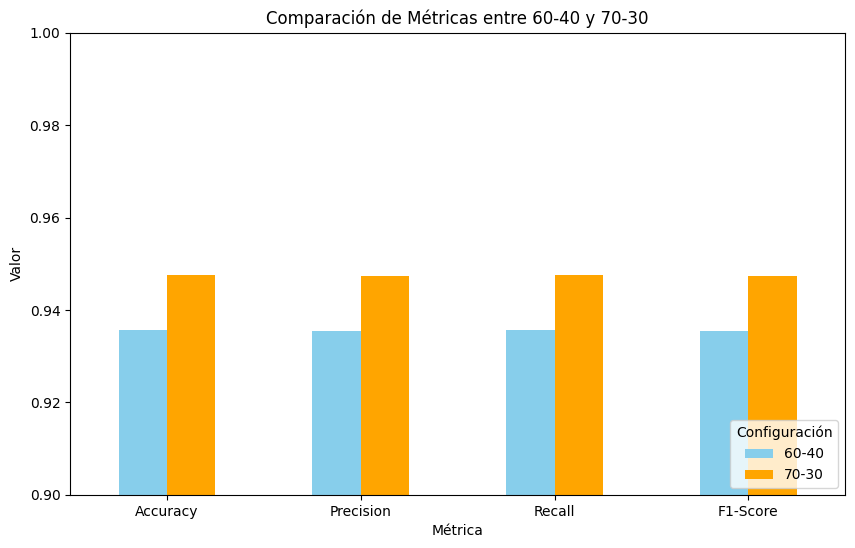

In [75]:
# Configurar el gráfico
resultados_df.set_index("Métrica").plot(kind="bar", figsize=(10, 6), rot=0, color=["skyblue", "orange"])

# Etiquetas y título
plt.title("Comparación de Métricas entre 60-40 y 70-30")
plt.ylabel("Valor")
plt.ylim(0.9, 1)
plt.legend(title="Configuración", loc="lower right")

# Mostrar el gráfico
plt.show()

70-30 parece ser la mejor configuración. Ofrece un rendimiento ligeramente mejor en todas las métricas clave y se beneficia de un conjunto de entrenamiento más grande, lo que mejora la capacidad del modelo para generalizar.

Regresión logística (se mantiene la elección 70 -30)

In [76]:
# Dividir los datos (ya con 70-30 definido como configuración final)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
model_log = LogisticRegression(max_iter=1000, random_state=42)
model_log.fit(X_train, y_train.to_numpy().ravel())
y_pred_log = model_log.predict(X_test)

In [78]:
# Evaluar las métricas de la regresión logística (70-30)
print("Resultados finales para Regresión Logística (70-30):")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Resultados finales para Regresión Logística (70-30):
Accuracy: 0.9619047619047619
              precision    recall  f1-score   support

           2       0.96      0.99      0.97       143
           4       0.97      0.91      0.94        67

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210



In [80]:
# Definir las predicciones para el modelo de Árbol de Decisión (70-30)
model_70 = DecisionTreeClassifier(random_state=42)
model_70.fit(X_train_70, y_train_70)
y_pred_70 = model_70.predict(X_test_30)

# Resultados del modelo de Árbol de Decisión
metrics_decision_tree = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test_30, y_pred_70),
    'Precision (macro avg)': classification_report(y_test_30, y_pred_70, output_dict=True)['macro avg']['precision'],
    'Recall (macro avg)': classification_report(y_test_30, y_pred_70, output_dict=True)['macro avg']['recall'],
    'F1-Score (macro avg)': classification_report(y_test_30, y_pred_70, output_dict=True)['macro avg']['f1-score']
}

In [82]:
# Definir las predicciones para el modelo de Regresión Logística (70-30)
model_log = LogisticRegression(max_iter=1000, random_state=42)
model_log.fit(X_train_70.to_numpy(), y_train_70.to_numpy().ravel())  # Convertir X_train_70 a NumPy
y_pred_log = model_log.predict(X_test_30.to_numpy())  # Convertir X_test_30 a NumPy para mantener consistencia

# Resultados del modelo de Regresión Logística
metrics_logistic_regression = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test_30, y_pred_log),
    'Precision (macro avg)': classification_report(y_test_30, y_pred_log, output_dict=True)['macro avg']['precision'],
    'Recall (macro avg)': classification_report(y_test_30, y_pred_log, output_dict=True)['macro avg']['recall'],
    'F1-Score (macro avg)': classification_report(y_test_30, y_pred_log, output_dict=True)['macro avg']['f1-score']
}

In [84]:
# Crear un DataFrame con los resultados
resultados_modelos = pd.DataFrame([metrics_decision_tree, metrics_logistic_regression])

# Mostrar la tabla comparativa
print("Comparación de Modelos:")
resultados_modelos

Comparación de Modelos:


,Model,Accuracy,Precision (macro avg),Recall (macro avg),F1-Score (macro avg)
0,Decision Tree,0.947619,0.944777,0.933775,0.938984
1,Logistic Regression,0.961905,0.963719,0.948231,0.955438


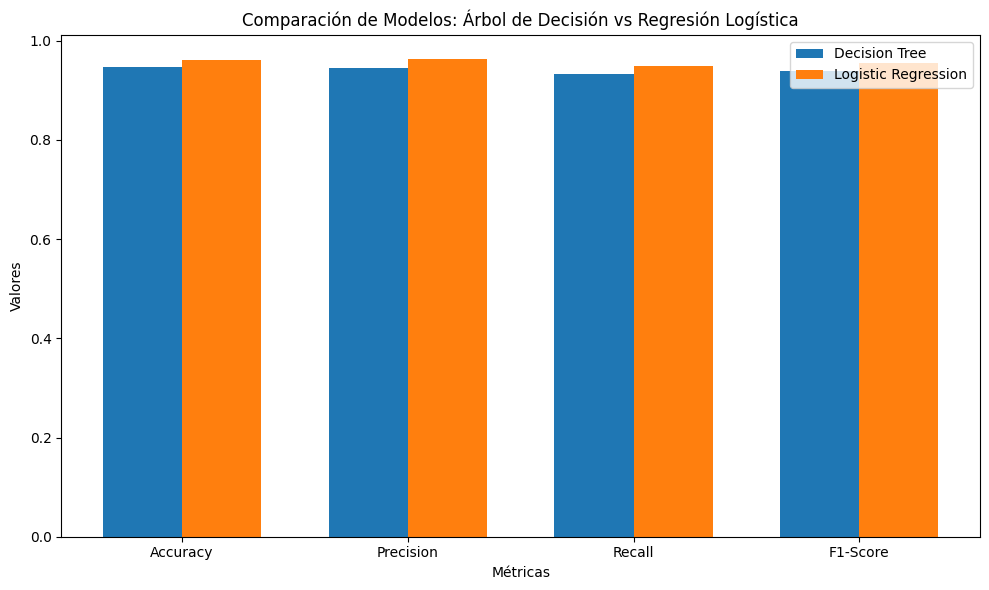

In [87]:
# Datos de los modelos (asegúrate de que cada lista tenga el mismo número de elementos)
valores = [
    [metrics_decision_tree['Accuracy'], metrics_logistic_regression['Accuracy']],
    [metrics_decision_tree['Precision (macro avg)'], metrics_logistic_regression['Precision (macro avg)']],
    [metrics_decision_tree['Recall (macro avg)'], metrics_logistic_regression['Recall (macro avg)']],
    [metrics_decision_tree['F1-Score (macro avg)'], metrics_logistic_regression['F1-Score (macro avg)']],
]

# Configurar las etiquetas y posiciones
categorias = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
modelos = ['Decision Tree', 'Logistic Regression']
x = np.arange(len(categorias))  # Posiciones para las categorías
ancho_barra = 0.35  # Ancho de las barras

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Agregar barras para cada modelo
for i, modelo in enumerate(modelos):
    ax.bar(x + i * ancho_barra, [fila[i] for fila in valores], ancho_barra, label=modelo)

# Personalizar la gráfica
ax.set_xlabel('Métricas')
ax.set_ylabel('Valores')
ax.set_title('Comparación de Modelos: Árbol de Decisión vs Regresión Logística')
ax.set_xticks(x + ancho_barra / 2)
ax.set_xticklabels(categorias)
ax.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

La Regresión Logística ha demostrado ser el modelo más eficiente para el conjunto de datos, ya que supera al Árbol de Decisión en todas las métricas evaluadas: Accuracy, Precision, Recall y F1-Score.
La diferencia más significativa se observa en la Precisión (Precision) y el F1-Score, lo que sugiere que la Regresión Logística es más consistente al clasificar correctamente las etiquetas.